In [2]:
import json
import string
import os
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

    

In [3]:
evaluating = {
    'best':1,
    'bad':0,
    'normal':0
}

데이터를 가져와 봅시다....
    데이터 크기 자체가 얼마 안돼서 유튜브/AHUB 프로/일반인 구분없이 한 폴더에 다 다운받아두엇습니다.

In [3]:

ann_target = 'C:/Users/haeinlee/Desktop/train_data/'
data_flag = 0

for (root_path, dir, files) in os.walk(ann_target):
    for d in dir:
        # 각 디렉토리에서 8개의 파일을 가져와야 함
        for (path, dir, files) in os.walk(root_path+'/'+d+'/'):
            j_index = 0
            directory_data=[]
            for file in files:
                try:
                    with open(path+file, "r", encoding='UTF8') as json_file:
                        nj_data = json.load(json_file)
                except:
                    pass
                try:
                    tmp = np.array(sum(nj_data['keypoints'],[]))
                    tmp[0::2] = tmp[0::2]/nj_data['resolution'][0]
                    tmp[1::2] = tmp[1::2]/nj_data['resolution'][1]
                    directory_data.append(tmp)
                    j_index+=1
                except:
                    print("json Error: "+file)

            if len(directory_data)<8:
                print("failed : "+path)
                
            else:
                if data_flag==0:
                    x=np.array([directory_data])
                    y=np.array([evaluating[nj_data['evaluation']]])
                    data_flag=1
                    print(x.shape)
                else:
                    x= np.concatenate((x, np.array([directory_data])),axis=0)
                    y= np.concatenate((y, [evaluating[nj_data['evaluation']]]))

(1, 8, 24)
failed : C:/Users/haeinlee/Desktop/train_data//2/
failed : C:/Users/haeinlee/Desktop/train_data//49/
failed : C:/Users/haeinlee/Desktop/train_data//50/
failed : C:/Users/haeinlee/Desktop/train_data//59/
failed : C:/Users/haeinlee/Desktop/train_data//64/
failed : C:/Users/haeinlee/Desktop/train_data//ama1/
failed : C:/Users/haeinlee/Desktop/train_data//ama10/
failed : C:/Users/haeinlee/Desktop/train_data//ama18/
failed : C:/Users/haeinlee/Desktop/train_data//ama2/
failed : C:/Users/haeinlee/Desktop/train_data//ama20/
failed : C:/Users/haeinlee/Desktop/train_data//ama25/
failed : C:/Users/haeinlee/Desktop/train_data//ama30/
failed : C:/Users/haeinlee/Desktop/train_data//ama31/
failed : C:/Users/haeinlee/Desktop/train_data//ama34/
failed : C:/Users/haeinlee/Desktop/train_data//ama37/
failed : C:/Users/haeinlee/Desktop/train_data//ama42/
failed : C:/Users/haeinlee/Desktop/train_data//ama45/
failed : C:/Users/haeinlee/Desktop/train_data//pub (9)/


In [8]:
x.shape

(158, 8, 24)

In [6]:
# 데이터를 랜덤하게 섞고 트레인, 테스트 셋을 나눠줍시다...
# 지금은 데이터가 얼마 없으니 그냥 안나누겠습니다
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=42)

In [7]:
len(y_train)

126

#LSTM 모델

In [5]:
 
model = Sequential()
model.add(LSTM(20, activation = 'sigmoid', input_shape=(8, 24)))
model.add(Dense(5))
model.add(Dense(1))
 
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='binary_crossentropy', patience=10, mode='auto',)

# mode=auto loss면 최저값이10번정도 반복되면 정지, acc면 최고값이 10번정도 반복되면 정지
# mode=min, mode=max
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[early_stopping])

history = model.fit(x_train, y_train, epochs=500, batch_size=10, verbose=2,validation_split=0.3)


NameError: name 'x_train' is not defined

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

테스트 데이터셋 떼어놓은거 검증

In [11]:
results = model.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.8438
test loss, test acc: [0.11745510250329971, 0.84375]


# 학습 그래프 그려볼게요

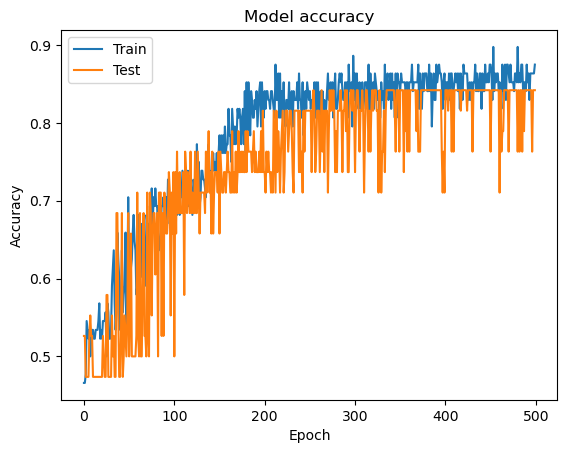

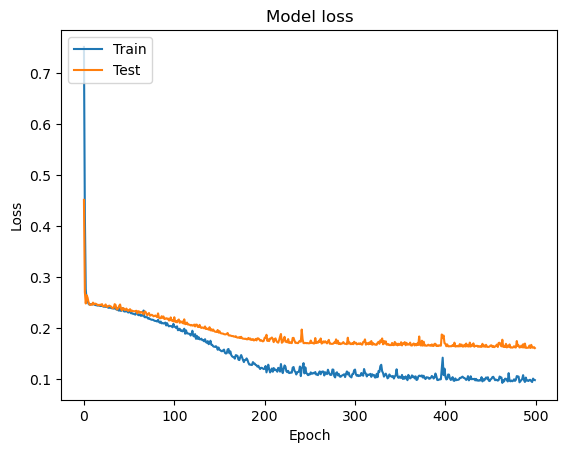

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

이번에도 epoch 200 정도에서 과적합 되는 것 같습니다.

# epoch 180 으로 학습 다시 시켜볼게요

In [16]:
history = model.fit(x_train, y_train, epochs=180, batch_size=10, verbose=2,validation_split=0.3)

Epoch 1/180
9/9 - 0s - loss: 0.0871 - accuracy: 0.8864 - val_loss: 0.1541 - val_accuracy: 0.8421 - 67ms/epoch - 7ms/step
Epoch 2/180
9/9 - 0s - loss: 0.0877 - accuracy: 0.8750 - val_loss: 0.1538 - val_accuracy: 0.8421 - 50ms/epoch - 6ms/step
Epoch 3/180
9/9 - 0s - loss: 0.0869 - accuracy: 0.8864 - val_loss: 0.1544 - val_accuracy: 0.8421 - 51ms/epoch - 6ms/step
Epoch 4/180
9/9 - 0s - loss: 0.0858 - accuracy: 0.8750 - val_loss: 0.1550 - val_accuracy: 0.8421 - 46ms/epoch - 5ms/step
Epoch 5/180
9/9 - 0s - loss: 0.0860 - accuracy: 0.8864 - val_loss: 0.1541 - val_accuracy: 0.8421 - 47ms/epoch - 5ms/step
Epoch 6/180
9/9 - 0s - loss: 0.0881 - accuracy: 0.8977 - val_loss: 0.1537 - val_accuracy: 0.8421 - 47ms/epoch - 5ms/step
Epoch 7/180
9/9 - 0s - loss: 0.0847 - accuracy: 0.8864 - val_loss: 0.1553 - val_accuracy: 0.8421 - 46ms/epoch - 5ms/step
Epoch 8/180
9/9 - 0s - loss: 0.0848 - accuracy: 0.8977 - val_loss: 0.1544 - val_accuracy: 0.8421 - 47ms/epoch - 5ms/step
Epoch 9/180
9/9 - 0s - loss: 0.0

테스트셋의 로스가 줄고 accuracy오르긴 했는데 찝찝합니다

In [18]:
results = model.evaluate(x_test, y_test, batch_size=10)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9062
test loss, test acc: [0.09729165583848953, 0.90625]


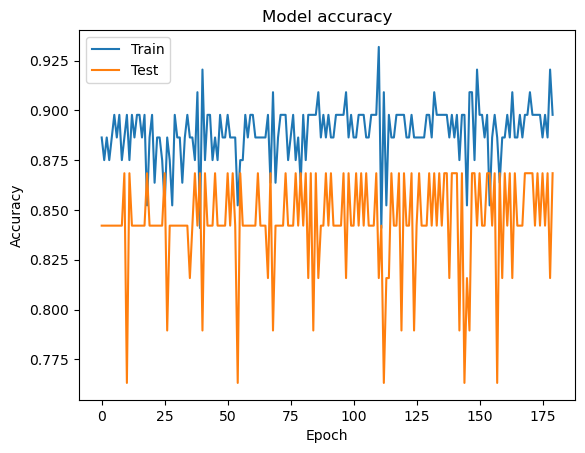

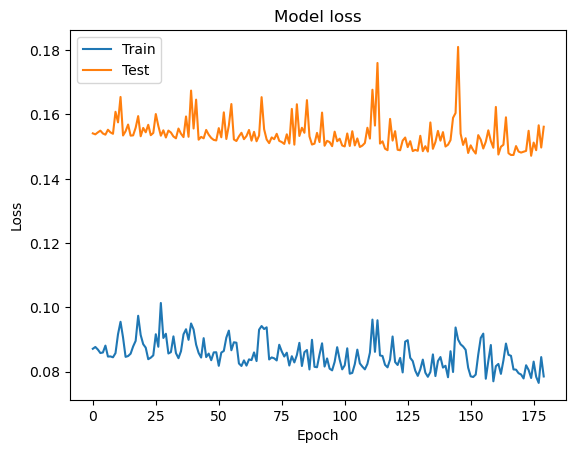

In [17]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

이런 그래프일 때 어떻게 대처해야 할까요....